# check dataloader

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
num_workers = os.cpu_count()
num_workers = 0
is_pseudo = True

series_df = pd.read_parquet("/kaggle/input/pseudo_train_series_fold0_le20.parquet")
# series_date_keyとseries_data_key_strのuniqueだけでdataframeを作る
key_df = series_df[["series_date_key", "series_date_key_str"]].drop_duplicates()
key_df["series_id"], key_df["date"] = (
    key_df["series_date_key_str"].str.split("_", 1).str
)
key_df = key_df.drop(columns=["series_date_key_str"], axis=1)
print(key_df.head())
print(series_df.head())
print("data loaded")

       series_date_key     series_id        date
0                    0  038441c925bb  2018-08-14
6120                 1  038441c925bb  2018-08-15
23400                2  038441c925bb  2018-08-16
40680                3  038441c925bb  2018-08-17
57960                4  038441c925bb  2018-08-18
      series_id  step                 timestamp  anglez    enmo  \
0  038441c925bb     0  2018-08-14T15:30:00-0400  2.6367  0.0217   
1  038441c925bb     1  2018-08-14T15:30:05-0400  2.6368  0.0215   
2  038441c925bb     2  2018-08-14T15:30:10-0400  2.6370  0.0216   
3  038441c925bb     3  2018-08-14T15:30:15-0400  2.6368  0.0213   
4  038441c925bb     4  2018-08-14T15:30:20-0400  2.6368  0.0215   

   anglez_absdiff  enmo_absdiff  anglez_absdiff_ave  enmo_absdiff_ave  event  \
0          0.0000        0.0000                 0.0               0.0    0.0   
1          0.0001        0.0002                 0.0               0.0    0.0   
2          0.0002        0.0001                 0.0            

/tmp/ipykernel_41470/3502025761.py:9: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  key_df["series_date_key_str"].str.split("_", 1).str
/tmp/ipykernel_41470/3502025761.py:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  key_df["series_id"], key_df["date"] = (


In [3]:
import sys
sys.path.append(os.path.join("/kaggle", "src", "data"))


In [4]:
import torch
from torch.utils.data import DataLoader

from dss_dataloader import DSSPseudoDataset

dataset = DSSPseudoDataset(key_df, series_df, pseudo_threshold=0.25)
# dataset = DSSAddRolldiffDatasetPL(key_df, series_df)
dataloader = DataLoader(
    dataset, batch_size=2, shuffle=False, num_workers=num_workers
)
print("dataloader length:", len(dataloader))
import time


dataloader length: 727


In [5]:
import matplotlib.pyplot as plt

10
load time: 0.2546422481536865
batch_idx: 0
pseudo_target (1, 17280)


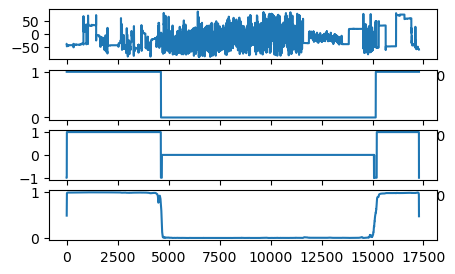

pseudo_target sum tensor(17091)
batch_idx: 1
pseudo_target (1, 17280)


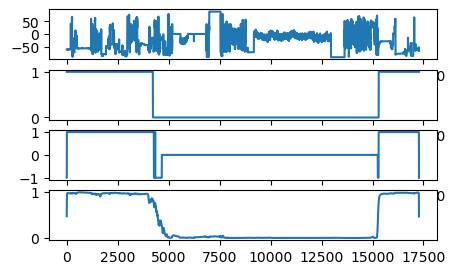

pseudo_target sum tensor(16857)
torch.Size([2, 4, 17280])
torch.Size([2, 1, 17280])
torch.Size([2, 1, 17280])
11
load time: 0.4586515426635742
batch_idx: 0
pseudo_target (1, 17280)


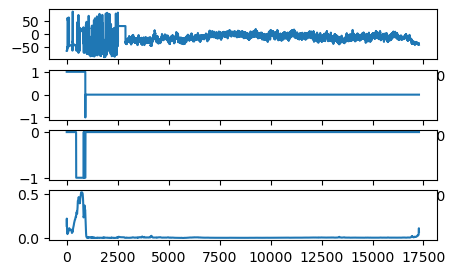

pseudo_target sum tensor(16850)
batch_idx: 1
pseudo_target (1, 17280)


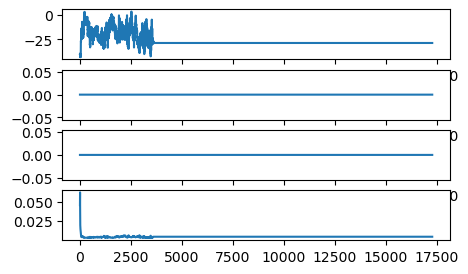

pseudo_target sum tensor(17280)
torch.Size([2, 4, 17280])
torch.Size([2, 1, 17280])
torch.Size([2, 1, 17280])
12
load time: 0.40050196647644043
batch_idx: 0
pseudo_target (1, 17280)


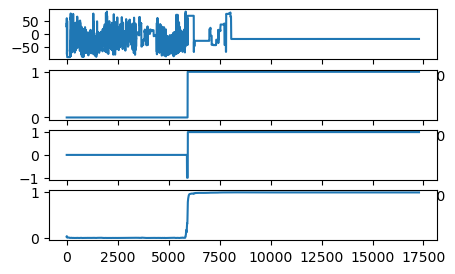

pseudo_target sum tensor(17240)
batch_idx: 1
pseudo_target (1, 17280)


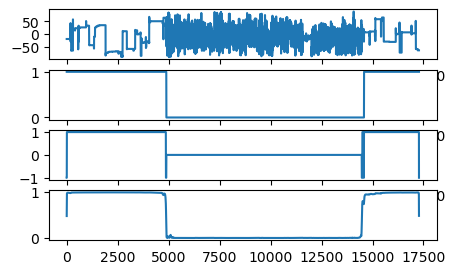

pseudo_target sum tensor(17206)
torch.Size([2, 4, 17280])
torch.Size([2, 1, 17280])
torch.Size([2, 1, 17280])
13
load time: 0.40483999252319336
batch_idx: 0
pseudo_target (1, 17280)


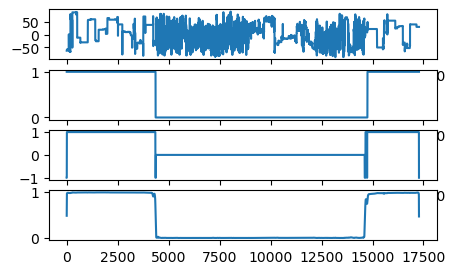

pseudo_target sum tensor(17201)
batch_idx: 1
pseudo_target (1, 17280)


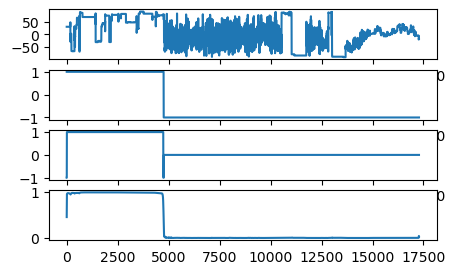

pseudo_target sum tensor(17253)
torch.Size([2, 4, 17280])
torch.Size([2, 1, 17280])
torch.Size([2, 1, 17280])
14
load time: 0.39771127700805664
batch_idx: 0
pseudo_target (1, 17280)


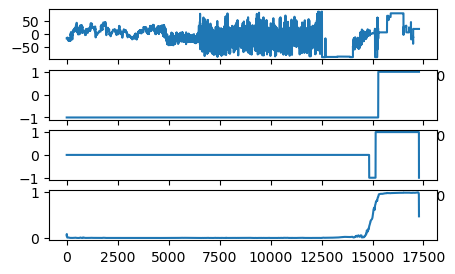

pseudo_target sum tensor(16960)
batch_idx: 1
pseudo_target (1, 17280)


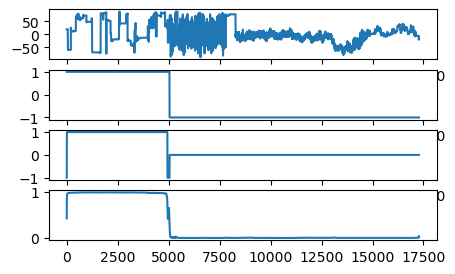

pseudo_target sum tensor(17171)
torch.Size([2, 4, 17280])
torch.Size([2, 1, 17280])
torch.Size([2, 1, 17280])
15
load time: 0.47257161140441895
batch_idx: 0
pseudo_target (1, 17280)


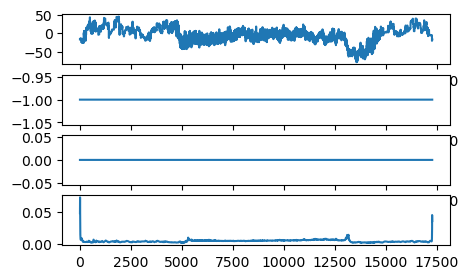

pseudo_target sum tensor(17280)
batch_idx: 1
pseudo_target (1, 17280)


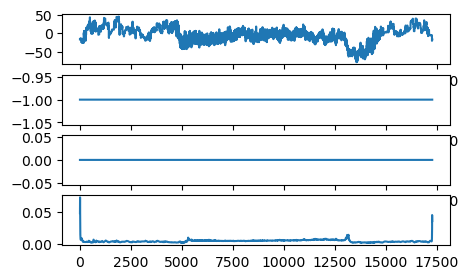

pseudo_target sum tensor(17280)
torch.Size([2, 4, 17280])
torch.Size([2, 1, 17280])
torch.Size([2, 1, 17280])


In [6]:
start_time = time.time()
for idx, (input, target, pseudo_target, input_info, pseudo_target_orig) in enumerate(dataloader):
    if idx < 10:
        continue
    elif idx > 15:
        break
    print(idx)
    load_time = time.time() - start_time
    print("load time:", load_time)
    start_time = time.time()
    for batch_idx in range(pseudo_target.shape[0]):
        print("batch_idx:", batch_idx)
        print("pseudo_target", pseudo_target[batch_idx].numpy().shape)
        plt.figure(figsize=(5, 3))
        plt.subplot(4, 1, 1)
        plt.plot(input[batch_idx,0,:].numpy().T)
        plt.subplot(4, 1, 2)
        plt.plot(target[batch_idx].numpy().T, label="target")
        plt.subplot(4, 1, 3)
        plt.plot(pseudo_target[batch_idx].numpy().T, label="pseudo_target")
        plt.subplot(4, 1, 4)
        plt.plot(pseudo_target_orig[batch_idx].numpy().T)
        
        plt.show() 
        print("pseudo_target sum", (pseudo_target[batch_idx] != -1).sum())

    print(input.shape)
    print(target.shape)
    print(pseudo_target.shape)